# Practical example Exercise - Drop Model Include Year

Linear Regression - Exercise
This is the moment where you really learn. <br>

Take the model we created as a basis and try to improve it.<br>

* I dropped Model and included year. The R-squared score improved over the original and over DropYearIncludeModel.
* I calculated adjusted R-squared and while there is a penatly for additional features is less than the penalty in the model with DropYearIncludeModel

## Importing the relevant libraries

In [3]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Loading the raw data

In [5]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [8]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [10]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [12]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [14]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\3514801760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

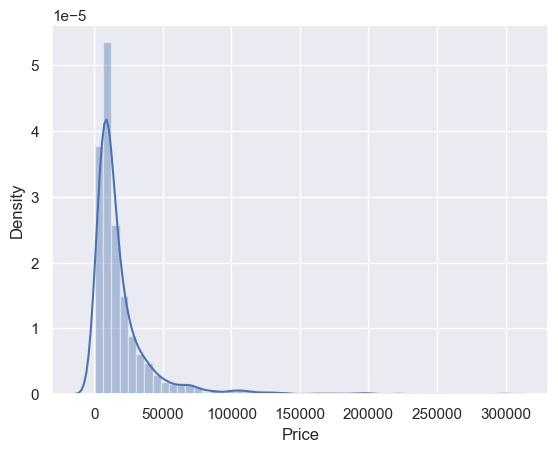

In [16]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [18]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\4102241817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

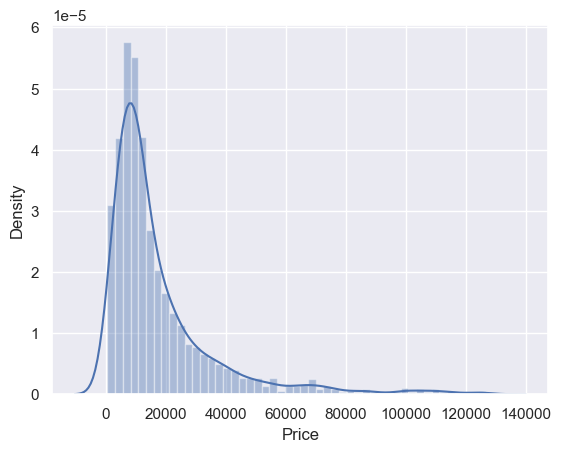

In [19]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\1674007885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

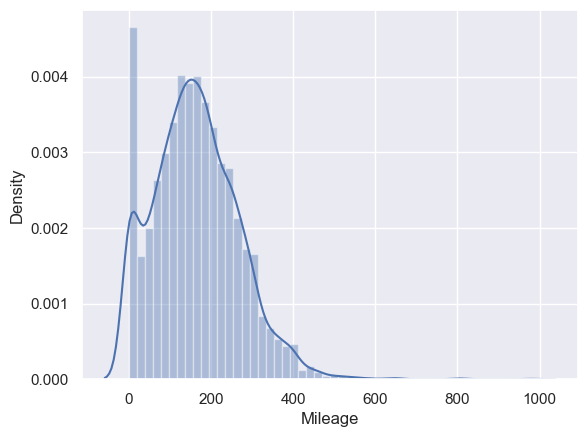

In [20]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [21]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\1666233205.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

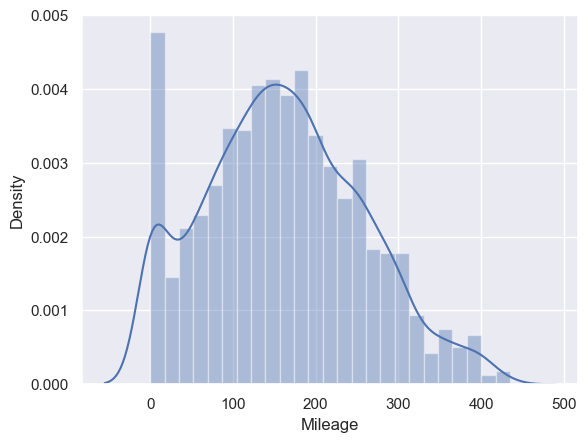

In [22]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\2097752121.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

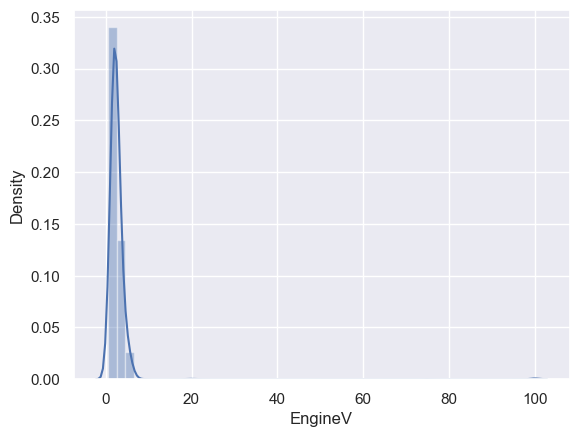

In [23]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(data_no_mv['EngineV'])

In [24]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\1910130346.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

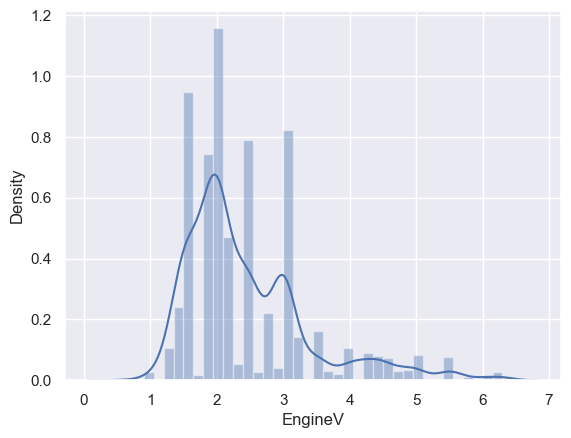

In [25]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\2257603476.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])


<Axes: xlabel='Year', ylabel='Density'>

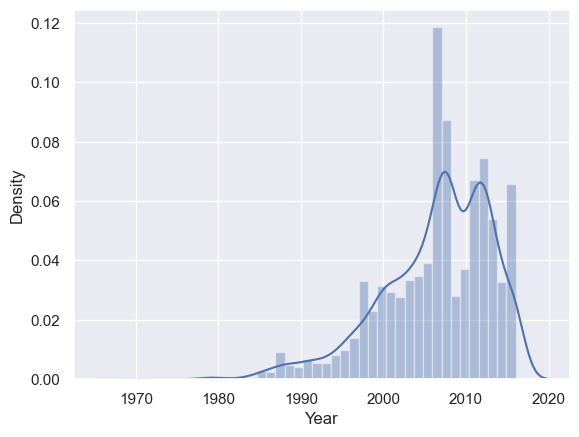

In [26]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [27]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\730772117.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

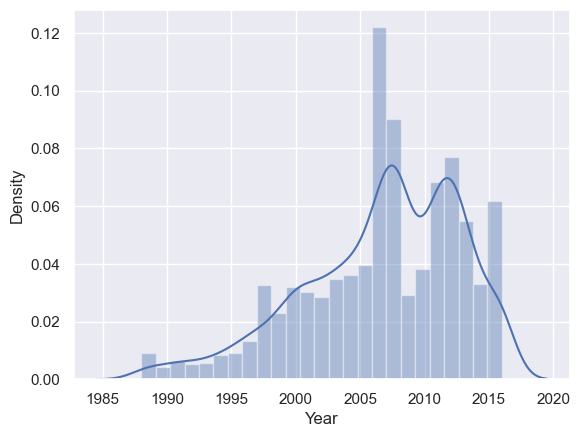

In [28]:
# Here's the new result
sns.distplot(data_4['Year'])

In [29]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [30]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

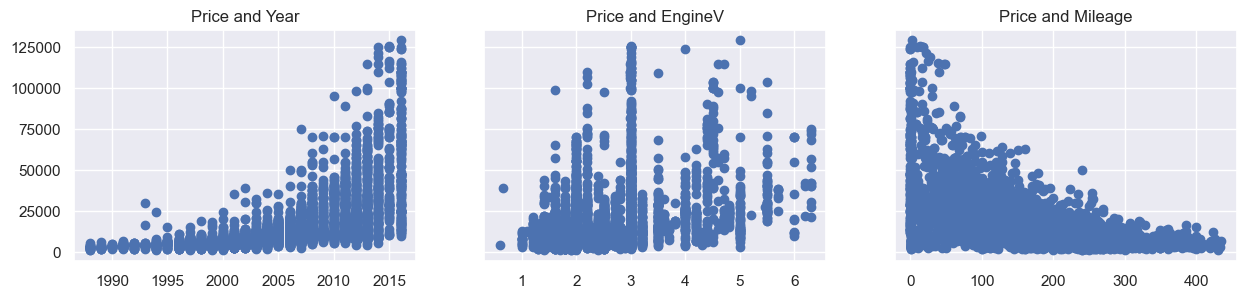

In [32]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\2845240188.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

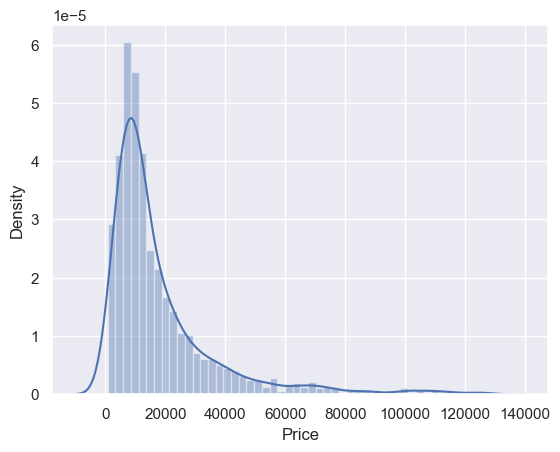

In [33]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [35]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


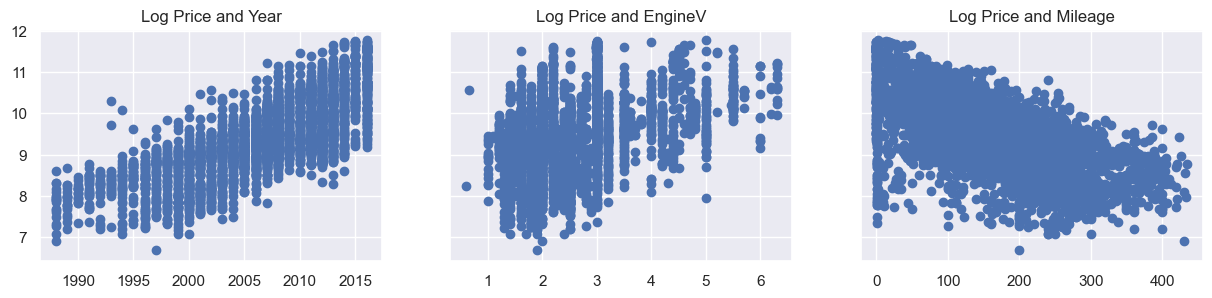

In [36]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [37]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [39]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [40]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [41]:
# Let's explore the result
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [42]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
#data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [44]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True) #BECAUSE WE ARE KEEPING YEAR IN THIS MODEL

In [45]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange a bit

In [47]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [48]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [49]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear regression model

### Declare the inputs and the targets

In [52]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [54]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [55]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [57]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [59]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

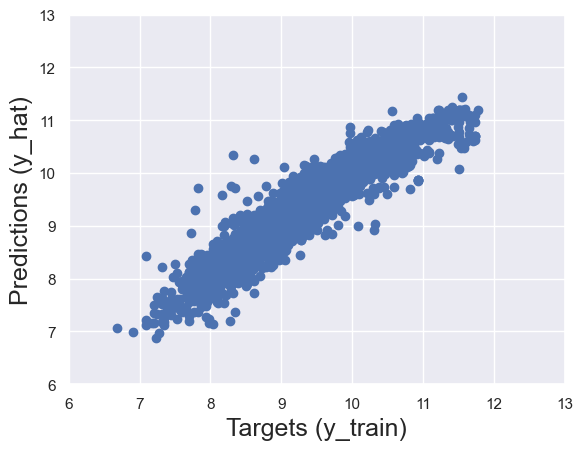

In [61]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\aaufdencamp\AppData\Local\Temp\ipykernel_79396\1719987585.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

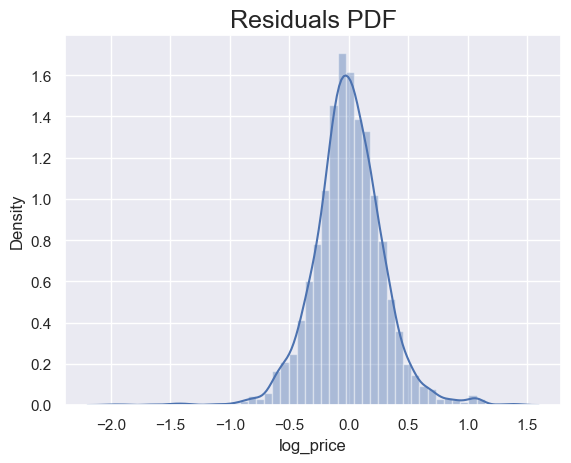

In [62]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [63]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.8849485492094937

In [64]:
#adjusted R2 1-((n-1)/(n-1-p))*(1-R**2)
p = 307
n = 3093
adj_r2 = 1-((n-1)/(n-1-p))*(1-reg.score(x_train,y_train))
adj_r2


0.8722660373988347

### Finding the weights and bias

In [66]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415379879770514

In [67]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.10834397,  0.21888063,  0.50702491,  0.02583093,  0.00271501,
       -0.13396361, -0.20432869, -0.07814928, -0.10319911, -0.09312869,
       -0.07587858, -0.14180638, -0.0980039 , -0.15795634, -0.04301379,
       -0.01846564, -0.06002956,  0.25497094])

In [68]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
pd.options.display.max_rows = 999
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.108344
1,EngineV,0.218881
2,Year,0.507025
3,Brand_BMW,0.025831
4,Brand_Mercedes-Benz,0.002715
5,Brand_Mitsubishi,-0.133964
6,Brand_Renault,-0.204329
7,Brand_Toyota,-0.078149
8,Brand_Volkswagen,-0.103199
9,Body_hatch,-0.093129


In [69]:
# dummylist = reg_summary['Features'][17:].tolist()
# dummylist[0][6:]

# # List to hold the substrings
# new_dummylist = []

# # Define the substring you want to extract 
# for item in dummylist:
#     # Get the substring (you can modify this part based on your needs)
#     substring = item[6:]  # Taking first 3 characters as an example
#     new_dummylist.append(substring)

# # Print the new list
# print(new_dummylist)
# type(new_dummylist)
# len(new_dummylist)

In [70]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()


# In this way we can see which 'Brand' is actually the benchmark --> Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [71]:
data_cleaned['Body'].unique()
# In this way we can see which 'Body' is actually the benchmark --> crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [72]:
data_cleaned['Engine Type'].unique()
# In this way we can see which 'Engine Type' is actually the benchmark --> Diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [73]:
data_cleaned['Registration'].unique()
# In this way we can see which 'Registration' is actually the benchmark --> no

array(['yes', 'no'], dtype=object)

In [74]:
# data_cleaned['Model'].unique()
# # In this way we can see which 'Registration' is actually the benchmark --> 1 Series

In [75]:
# cleaned = data_cleaned['Model'].unique()
# cleaned = cleaned.tolist()
# cleaned.sort()
# len(cleaned)

In [76]:
# benchmark = [i for i in cleaned if i not in new_dummylist]
# #benchmark = [i for i in cleaned if i not in original]
# benchmark #benchmark for Model dummy variables: 1 Series

## Testing

In [78]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

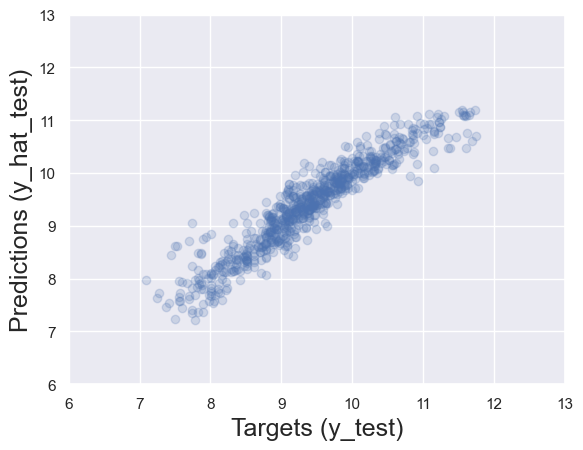

In [79]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [80]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,8518.982858
1,3282.274819
2,1593.751749
3,7141.202337
4,8906.586822


In [81]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,8518.982858,NaN
1,3282.274819,7900.00
2,1593.751749,NaN
3,7141.202337,NaN
4,8906.586822,NaN
5,36575.547365,14200.00
6,23813.119688,NaN
7,19791.529341,NaN
8,13305.067210,11950.00
9,40533.941832,NaN


In [82]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [83]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,8518.982858,2300.00
1,3282.274819,2800.00
2,1593.751749,2500.00
3,7141.202337,6400.00
4,8906.586822,9150.00
5,36575.547365,20000.00
6,23813.119688,38888.00
7,19791.529341,16999.00
8,13305.067210,12500.00
9,40533.941832,41000.00


In [84]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [85]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,8518.982858,2300.00,-6218.982858,270.390559
1,3282.274819,2800.00,-482.274819,17.224101
2,1593.751749,2500.00,906.248251,36.249930
3,7141.202337,6400.00,-741.202337,11.581287
4,8906.586822,9150.00,243.413178,2.660253
5,36575.547365,20000.00,-16575.547365,82.877737
6,23813.119688,38888.00,15074.880312,38.764864
7,19791.529341,16999.00,-2792.529341,16.427610
8,13305.067210,12500.00,-805.067210,6.440538
9,40533.941832,41000.00,466.058168,1.136727


In [86]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()
# NAN implies 0/0 or inf/inf and inf implies 1/0 and -inf implies -1/0

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16678.159053,18165.817106,1487.658053,23.303106
std,14067.654521,19967.858908,9745.038154,26.166910
min,1366.558774,1200.000000,-23675.039252,0.008150
25%,6502.797787,6900.000000,-1749.131999,7.738524
50%,12357.260514,11600.000000,59.230623,16.253640
75%,21973.290031,20500.000000,1649.253553,30.146462
max,73147.951567,126000.000000,81495.898963,270.390559


In [87]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
108,6500.53,6500.00,-0.53,0.01
738,24875.40,24900.00,24.60,0.10
79,15716.88,15700.00,-16.88,0.11
16,20526.82,20500.00,-26.82,0.13
323,9917.04,9900.00,-17.04,0.17
410,14830.84,14800.00,-30.84,0.21
340,15435.53,15400.00,-35.53,0.23
631,8480.22,8500.00,19.78,0.23
350,23444.30,23500.00,55.70,0.24
452,37604.64,37700.00,95.36,0.25


In [88]:
from sklearn.feature_selection import f_regression

In [89]:
f_regression(inputs_scaled,targets)

(array([2.34868930e+03, 7.89888682e+02, 4.87676964e+03, 3.18290734e+01,
        6.30430727e+01, 2.54300718e+01, 1.74422883e+02, 8.68940910e+01,
        4.38403349e+01, 7.55149968e+01, 4.47798855e+00, 6.83984654e+01,
        1.28305416e+02, 5.95468872e+01, 2.97759428e+01, 3.69629082e+00,
        6.94646292e+00, 1.05453026e+03]),
 array([0.00000000e+000, 2.65855077e-158, 0.00000000e+000, 1.80420259e-008,
        2.62901969e-015, 4.79766231e-007, 5.52787198e-039, 1.87306983e-020,
        4.05331961e-011, 5.26975221e-018, 3.43978741e-002, 1.81728039e-016,
        2.77241307e-029, 1.50990623e-014, 5.15395626e-008, 5.46069820e-002,
        8.43206723e-003, 9.25417095e-205]))

In [90]:
p_values = f_regression(inputs_scaled,targets)[1]
p_values

array([0.00000000e+000, 2.65855077e-158, 0.00000000e+000, 1.80420259e-008,
       2.62901969e-015, 4.79766231e-007, 5.52787198e-039, 1.87306983e-020,
       4.05331961e-011, 5.26975221e-018, 3.43978741e-002, 1.81728039e-016,
       2.77241307e-029, 1.50990623e-014, 5.15395626e-008, 5.46069820e-002,
       8.43206723e-003, 9.25417095e-205])

In [91]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.034, 0.   , 0.   , 0.   , 0.   , 0.055, 0.008, 0.   ])

In [92]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
pd.options.display.max_rows = 999
reg_summary['Weights'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Weights,p-values
0,Mileage,-0.11,0.00
1,EngineV,0.22,0.00
2,Year,0.51,0.00
3,Brand_BMW,0.03,0.00
4,Brand_Mercedes-Benz,0.00,0.00
5,Brand_Mitsubishi,-0.13,0.00
6,Brand_Renault,-0.20,0.00
7,Brand_Toyota,-0.08,0.00
8,Brand_Volkswagen,-0.10,0.00
9,Body_hatch,-0.09,0.00


The feature with Engine Type_Other appears to not statistically significant so I can drop that feature in the next iteration of the model.